In [1]:
import matplotlib.pyplot as plt
from BP import *
from discretization import *
from solvers import *
%matplotlib inline

Consider the operator

$$
A = e^{2(x-y)}\partial_x^2 + e^{2(y-x)}\partial_y^2 + \alpha\cos(\pi(x+y))\partial_x
$$

$$
u = \sin(2 \pi x)\sin(\pi y)
$$

Code below computes

$$
\left\|[A]_{\text{grid}}[u]_{\text{grid}} - [Au]_{\text{grid}}\right\|_{\infty}
$$

where by grid we mean the finite difference discretization and the projection on the uniform grid.

In [2]:
a = lambda x, y: 3*np.cos(np.pi*(x+y))
b = lambda x, y: (np.exp(2*(x-y)))
c = lambda x, y: np.zeros_like(x)
d = lambda x, y: (np.exp(-2*(x-y)))

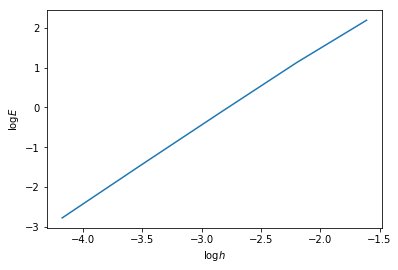

In [3]:
E = []
H = []
for J in [2, 3, 4, 5, 6]:
    N = 2**J
    h = 1/(N+1)
    X = np.linspace(h, 1-h, N)
    x, y = np.meshgrid(X, X)
    exact = (np.sin(2*np.pi*x)*np.sin(np.pi*y)).reshape((-1,))
    a_ = 3*np.cos(np.pi*(x+y)).reshape((-1,))
    b_ = (np.exp(2*(x-y))).reshape((-1,))
    d_ = (np.exp(-2*(x-y))).reshape((-1,))
    a__ = (np.cos(2*np.pi*x)*np.sin(np.pi*y)).reshape((-1,))
    rhs = (2*np.pi*a_*a__ - (2*np.pi)**2*exact*b_ - np.pi**2*exact*d_)
    D = delta(N, a, b, c, d)
    error = np.linalg.norm(D @ exact - rhs, ord=np.inf)
    E.append(error)
    H.append(h)
plt.plot(np.log(H), np.log(E))
plt.xlabel('$\log h$')
plt.ylabel('$\log E$');

The approximation is of the second order, so discretization is correct.

___

This rest of the code reproduces two figures from the article.

In [3]:
a = lambda x, y: 3*np.cos(np.pi*(x+y))
b = lambda x, y: (np.exp(2*(x-y)))
c = lambda x, y: np.zeros_like(x)
d = lambda x, y: (np.exp(-2*(x-y)))

N = 2**5
h = 1/(N+1)
X = np.linspace(h, 1-h, N)
x, y = np.meshgrid(X, X)
Delta = delta(N, a, b, c, d)
exact = (np.sin(2*np.pi*x)*np.sin(np.pi*y)).reshape((-1,))
a_ = 3*np.cos(np.pi*(x+y)).reshape((-1,))
b_ = (np.exp(2*(x-y))).reshape((-1,))
d_ = (np.exp(-2*(x-y))).reshape((-1,))
a__ = (np.cos(2*np.pi*x)*np.sin(np.pi*y)).reshape((-1,))
rhs = (2*np.pi*a_*a__ - (2*np.pi)**2*exact*b_ - np.pi**2*exact*d_)

In [4]:
x, E_CG = BICGSTAB(Delta, rhs, tol=1e-15, write=True)
x, E_GS = GS(Delta, rhs, tol=h**2, write=True)
x, E_BP = asymmetric_BP_solver(Delta, rhs, tol=h**2, write=True)
x, E_stripes = stripes_BP_solver(Delta, rhs, tol=h**2, write=True)
x, E_split = split_BP_solver(Delta, rhs, tol=h**2, write=True)
x, E_thick_stripes = thick_stripes_BP_solver(Delta, rhs, tol=h**2, write=True)

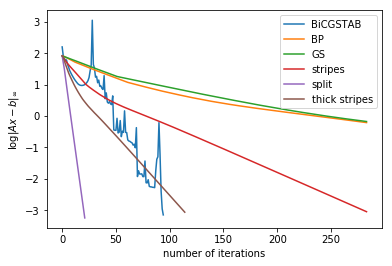

In [5]:
up_CG = np.where(np.array(E_CG)<h**2)[0][0] + 1
up_GS = np.max([len(E_stripes), len(E_split), len(E_thick_stripes)])
plt.plot(np.arange(len(E_CG[:up_CG])), np.log10(E_CG)[:up_CG], label='BiCGSTAB')
plt.plot(np.arange(len(E_BP[:up_GS])), np.log10(E_BP[:up_GS]), label='BP')
plt.plot(np.arange(len(E_GS[:up_GS])), np.log10(E_GS[:up_GS]), label='GS')
plt.plot(np.arange(len(E_stripes)), np.log10(E_stripes), label='stripes')
plt.plot(np.arange(len(E_split)), np.log10(E_split), label='split')
plt.plot(np.arange(len(E_thick_stripes)), np.log10(E_thick_stripes), label='thick stripes')
plt.xlabel('number of iterations')
plt.ylabel('$\log \|A x - b\|_{\infty}$')
plt.legend()
plt.savefig('equation_1.eps', format='eps');

In [7]:
a = lambda x, y: 50*np.cos(np.pi*(x+y))
b = lambda x, y: (np.exp(2*(x-y)))
c = lambda x, y: np.zeros_like(x)
d = lambda x, y: (np.exp(-2*(x-y)))

N = 2**5
h = 1/(N+1)
X = np.linspace(h, 1-h, N)
x, y = np.meshgrid(X, X)
Delta = delta(N, a, b, c, d)
exact = (np.sin(2*np.pi*x)*np.sin(np.pi*y)).reshape((-1,))
a_ = 50*np.cos(np.pi*(x+y)).reshape((-1,))
b_ = (np.exp(2*(x-y))).reshape((-1,))
d_ = (np.exp(-2*(x-y))).reshape((-1,))
a__ = (np.cos(2*np.pi*x)*np.sin(np.pi*y)).reshape((-1,))
rhs = (2*np.pi*a_*a__ - (2*np.pi)**2*exact*b_ - np.pi**2*exact*d_)

In [8]:
x, E_CG = BICGSTAB(Delta, rhs, tol=1e-15, write=True)
x, E_GS = GS(Delta, rhs, tol=h**2, write=True)
x, E_BP = asymmetric_BP_solver(Delta, rhs, tol=h**2, write=True)
x, E_stripes = stripes_BP_solver(Delta, rhs, tol=h**2, write=True)
x, E_split = split_BP_solver(Delta, rhs, tol=h**2, write=True)
x, E_thick_stripes = thick_stripes_BP_solver(Delta, rhs, tol=h**2, write=True)

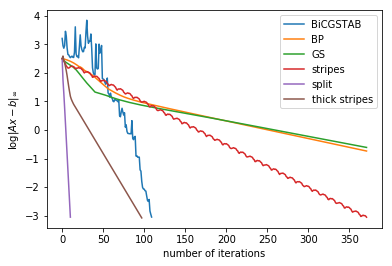

In [9]:
up_CG = np.where(np.array(E_CG)<h**2)[0][0] + 1
up_GS = np.max([len(E_stripes), len(E_split), len(E_thick_stripes)])
plt.plot(np.arange(len(E_CG[:up_CG])), np.log10(E_CG)[:up_CG], label='BiCGSTAB')
plt.plot(np.arange(len(E_BP[:up_GS])), np.log10(E_BP[:up_GS]), label='BP')
plt.plot(np.arange(len(E_GS[:up_GS])), np.log10(E_GS[:up_GS]), label='GS')
plt.plot(np.arange(len(E_stripes)), np.log10(E_stripes), label='stripes')
plt.plot(np.arange(len(E_split)), np.log10(E_split), label='split')
plt.plot(np.arange(len(E_thick_stripes)), np.log10(E_thick_stripes), label='thick stripes')
plt.xlabel('number of iterations')
plt.ylabel('$\log \|A x - b\|_{\infty}$')
plt.legend()
plt.savefig('equation_2.eps', format='eps');